In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
fut1m_df = pd.read_csv('data/minute_bar_data26022022/data/VN30F1M-20220226.csv')
fut2m_df = pd.read_csv('data/minute_bar_data26022022/data/VN30F2M-20220226.csv')

In [154]:
fut1m_df.tail(20)

,open,high,low,close,volume,buy_volume,sell_volume,date
timestamp,,,,,,,,
2022-02-25 14:12:58,1520400,1520900,1520400,1520900,670,483,187,20220225
2022-02-25 14:13:59,1521000,1521400,1520800,1521000,518,217,301,20220225
2022-02-25 14:14:56,1521000,1521800,1521000,1521400,609,204,405,20220225
2022-02-25 14:15:59,1521200,1521200,1520600,1521100,512,172,340,20220225
2022-02-25 14:16:58,1521600,1522300,1521600,1522000,794,410,384,20220225
2022-02-25 14:17:56,1521800,1522000,1521100,1521900,418,149,269,20220225
2022-02-25 14:18:58,1522000,1522000,1520900,1520900,712,314,398,20220225
2022-02-25 14:19:59,1521000,1521200,1520900,1521200,1125,222,903,20220225
2022-02-25 14:20:58,1521200,1521300,1520800,1521000,583,416,167,20220225


In [5]:
fut1m_df.tail(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
260368,VN30F1M,20220225 14:29:59,1518400,1519000,1518200,1519000,917,439,478
260369,VN30F1M,20220225 14:30:04,1518500,1518500,1518500,1518500,47,47,0
260370,VN30F1M,20220225 14:45:17,1517000,1517000,1517000,1517000,4355,4355,0


In [6]:
fut2m_df.head(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
0,VN30F2M,20171106 09:00:03,844000,844000,844000,844000,4,0,4
1,VN30F2M,20171106 09:04:56,844000,844000,844000,844000,3,3,0
2,VN30F2M,20171106 09:07:49,843300,843300,843200,843200,6,0,6


In [7]:
fut2m_df.tail(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
156617,VN30F2M,20220225 14:27:55,1516500,1516500,1516500,1516500,1,1,0
156618,VN30F2M,20220225 14:29:36,1516800,1516800,1516100,1516100,5,4,1
156619,VN30F2M,20220225 14:45:17,1513900,1513900,1513900,1513900,20,20,0


In [8]:
fut1m_df = fut1m_df.rename(columns={"TRADING_DATE": "timestamp", 
                                    "OPEN_PRICE": "open", "HIGH_PRICE": "high", "LOW_PRICE": "low", "CLOSE_PRICE": "close", 
                                    "VOLUME": "volume", "BUY_VOLUME": "buy_volume", "SELL_VOLUME": "sell_volume"})
fut2m_df = fut2m_df.rename(columns={"TRADING_DATE": "timestamp", 
                                    "OPEN_PRICE": "open", "HIGH_PRICE": "high", "LOW_PRICE": "low", "CLOSE_PRICE": "close", 
                                    "VOLUME": "volume", "BUY_VOLUME": "buy_volume", "SELL_VOLUME": "sell_volume"})

### data process

In [9]:
fut1m_df = fut1m_df[['timestamp','open','high','low','close','volume','buy_volume','sell_volume']]
fut1m_df = fut1m_df.set_index('timestamp')
fut1m_df.index = pd.to_datetime(fut1m_df.index)

In [10]:
fut2m_df = fut2m_df[['timestamp','open','high','low','close','volume','buy_volume','sell_volume']]
fut2m_df = fut2m_df.set_index('timestamp')
fut2m_df.index = pd.to_datetime(fut2m_df.index)

In [11]:
# fut1m_df['date'] = fut1m_df['TRADING_DATE_'].apply(lambda x: x.date())
# fut1m_df['date'] = fut1m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
# fut1m_df['time'] = fut1m_df['TRADING_DATE_'].apply(lambda x: x.time())

# fut2m_df['date'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.date())
# fut2m_df['date'] = fut2m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
# fut2m_df['time'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.time())
# fut2m_df['hhmm'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.hour * 100 + x.minute)

In [258]:
fut1m_df.tail(1218)

,open,high,low,close,volume,buy_volume,sell_volume,date
timestamp,,,,,,,,
2022-02-18 14:29:56,1524800,1524900,1524100,1524900,807,462,345,20220218
2022-02-18 14:30:05,1524600,1525200,1524600,1525200,196,111,85,20220218
2022-02-18 14:45:24,1525000,1525000,1525000,1525000,4335,4335,0,20220218
2022-02-21 09:00:57,1523400,1523900,1523200,1523900,651,96,555,20220221
2022-02-21 09:01:59,1523600,1523700,1522700,1523000,569,253,316,20220221
...,...,...,...,...,...,...,...,...
2022-02-25 14:27:59,1518500,1518500,1518100,1518500,1115,800,315,20220225
2022-02-25 14:28:58,1518000,1518500,1518000,1518500,494,195,299,20220225
2022-02-25 14:29:59,1518400,1519000,1518200,1519000,917,439,478,20220225


* resample to 30 minute bar

In [419]:
fut1m_df.head(3)

,open,high,low,close,volume,buy_volume,sell_volume,date
timestamp,,,,,,,,
2017-11-06 08:59:59,841000,841000,841000,841000,1,1,0,20171106
2017-11-06 09:00:51,841000,841700,840600,840600,253,243,10,20171106
2017-11-06 09:01:48,841000,841000,840700,841000,43,35,8,20171106


In [13]:
fut1m_df_ = fut1m_df.resample('30Min', closed='right', label='right').agg(
            {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 
             'volume': 'sum', 'buy_volume': 'sum', 'sell_volume': 'sum'})

fut2m_df_ = fut2m_df.resample('30Min', closed='right', label='right').agg(
            {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 
             'volume': 'sum', 'buy_volume': 'sum', 'sell_volume': 'sum'})

In [15]:
fut1m_df_ = fut1m_df_.dropna()
fut2m_df_ = fut2m_df_.dropna()

In [16]:
fut1m_df_ = fut1m_df_.reset_index()
fut2m_df_ = fut2m_df_.reset_index()

In [17]:
fut1m_df_['date'] = fut1m_df_['timestamp'].apply(lambda x: x.date())

In [18]:
day_of_week_v = [x.weekday() for x in np.unique(fut1m_df_['date'].values)]
day_of_week_v = np.array(day_of_week_v)

In [19]:
fut1m_df_['date'] = fut1m_df_['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
fut1m_df_['time'] = fut1m_df_['timestamp'].apply(lambda x: x.time())

fut2m_df_['date'] = fut2m_df_['timestamp'].apply(lambda x: x.date())
fut2m_df_['date'] = fut2m_df_['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
fut2m_df_['time'] = fut2m_df_['timestamp'].apply(lambda x: x.time())

In [20]:
fut1m_df_['hhmm'] = fut1m_df_['time'].apply(lambda x: x.hour * 100 + x.minute)
fut2m_df_['hhmm'] = fut2m_df_['time'].apply(lambda x: x.hour * 100 + x.minute)

In [21]:
fut1m_df['date'] = fut1m_df.index.map(lambda x: x.date())
fut1m_df['date'] = fut1m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))

In [22]:
fut1m_df_['hhmm'].value_counts()

1430    1076
1030    1076
1500    1076
1100    1076
1330    1076
1130    1076
930     1076
1400    1076
1000    1076
1200    1040
1300       6
900        5
Name: hhmm, dtype: int64

In [23]:
fut1m_df_.loc[fut1m_df_['hhmm']==1200]

,timestamp,open,high,low,close,volume,buy_volume,sell_volume,date,time,hhmm
16,2017-11-07 12:00:00,849300.0,849300.0,849300.0,849300.0,4,0,4,20171107,12:00:00,1200
26,2017-11-08 12:00:00,850100.0,850100.0,850100.0,850100.0,38,38,0,20171108,12:00:00,1200
36,2017-11-09 12:00:00,860300.0,860300.0,860300.0,860300.0,9,0,9,20171109,12:00:00,1200
46,2017-11-10 12:00:00,858400.0,858400.0,858400.0,858400.0,21,0,21,20171110,12:00:00,1200
74,2017-11-15 12:00:00,874500.0,874500.0,874500.0,874500.0,1,1,0,20171115,12:00:00,1200
...,...,...,...,...,...,...,...,...,...,...,...
10690,2022-02-21 12:00:00,1525600.0,1525600.0,1525600.0,1525600.0,7,7,0,20220221,12:00:00,1200
10700,2022-02-22 12:00:00,1507200.0,1507300.0,1506900.0,1507300.0,60,24,36,20220222,12:00:00,1200
10710,2022-02-23 12:00:00,1532200.0,1532200.0,1532100.0,1532100.0,46,39,7,20220223,12:00:00,1200
10720,2022-02-24 12:00:00,1512500.0,1512500.0,1512500.0,1512500.0,25,25,0,20220224,12:00:00,1200


In [24]:
for t in [900, 930, 1000, 1030, 1100, 1130, 1200, 1230, 1300, 1330, 1400, 1430, 1500]:
    print('processing for time: ', t)
    print(fut1m_df_.loc[fut1m_df_['hhmm']==t]['volume'].median())

processing for time:  900
578.0
processing for time:  930
11307.5
processing for time:  1000
10159.0
processing for time:  1030
9750.0
processing for time:  1100
10833.5
processing for time:  1130
12047.5
processing for time:  1200
54.0
processing for time:  1230
nan
processing for time:  1300
1.0
processing for time:  1330
13979.5
processing for time:  1400
16653.5
processing for time:  1430
20243.0
processing for time:  1500
3953.0


In [25]:
valid_time = [930, 1000, 1030, 1100, 1130, 1330, 1400, 1430, 1500]

In [26]:
fut1m_filt_df = fut1m_df_.loc[fut1m_df_['hhmm'].isin(valid_time)]
fut2m_filt_df = fut2m_df_.loc[fut2m_df_['hhmm'].isin(valid_time)]

In [27]:
print(fut1m_df_.shape)
print(fut1m_filt_df.shape)
print(fut2m_df_.shape)
print(fut2m_filt_df.shape)

(10735, 11)
(9684, 11)
(9874, 11)
(9656, 11)


In [28]:
dates_v = np.unique(fut1m_filt_df['date'].values)

In [29]:
dates_v

array([20171106, 20171107, 20171108, ..., 20220223, 20220224, 20220225],
      dtype=int64)

In [30]:
valid_time_v = np.array(valid_time)

In [31]:
valid_time_v

array([ 930, 1000, 1030, 1100, 1130, 1330, 1400, 1430, 1500])

In [50]:
import calendar

def third_thursday(year):
    c = calendar.Calendar(firstweekday=calendar.FRIDAY)
    third_thurs = []
    for m in range(1,13):
        thurs = c.monthdatescalendar(year, m)[2][-1]
        third_thurs.append(thurs)
    return third_thurs

roll_dates = third_thursday(2017) + third_thursday(2018) + third_thursday(2019) + third_thursday(2020) + third_thursday(2021) + third_thursday(2022)
roll_dates = [int(x.year * 1e4 + x.month * 1e2 + x.day) for x in roll_dates]
is_roll_day = np.in1d(dates_v, roll_dates)

In [51]:
is_roll_day

array([False, False, False, ..., False, False, False])

### ALPHA BACKTEST

In [39]:
import imp
import tsOp
import simOp
imp.reload(tsOp)
imp.reload(simOp)

<module 'simOp' from 'C:\\Users\\user\\Documents\\Work\\Personal Investment\\vn\\simOp.py'>

In [33]:
open_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'open')
high_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'high')
low_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'low')
close_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'close')
total_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'volume')
buy_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'buy_volume')
sell_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'sell_volume')

In [34]:
open_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'open')
high_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'high')
low_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'low')
close_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'close')
total_volume_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'volume')
buy_volume_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'buy_volume')
sell_volume_df1 = fut2m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'sell_volume')

In [35]:
dates_v

array([20171106, 20171107, 20171108, ..., 20220223, 20220224, 20220225],
      dtype=int64)

In [36]:
day_of_week_v

array([0, 1, 2, ..., 2, 3, 4])

* Idea: check intraday return from ytd close to a certain time today and follow the trend, then get out at close

Number of backtest days:  1076
Trading frequency:  94.24%
Annualized return:  41.13%
Annualized volatility: 17.67%
Annualized Sharpe: 2.33
Hit Ratio: 0.55
Max Drawdown: 12.43%
Average profit per trade before cost: 0.21%
Average profit per trade after cost: 0.17%


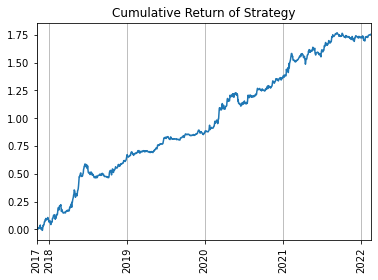

In [225]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [226]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  34.45463312034796
Tue median return (in bps):  12.285953855259068
Wed median return (in bps):  12.03060273291891
Thu median return (in bps):  8.776941495171645
Fri median return (in bps):  14.510005160584845


In [157]:
np.mean(pnl_v) * 1e4

14.907357417937527

Number of backtest days:  1076
Trading frequency:  93.68%
Annualized return:  29.82%
Annualized volatility: 17.78%
Annualized Sharpe: 1.68
Hit Ratio: 0.53
Max Drawdown: 27.35%
Average profit per trade before cost: 0.16%
Average profit per trade after cost: 0.13%


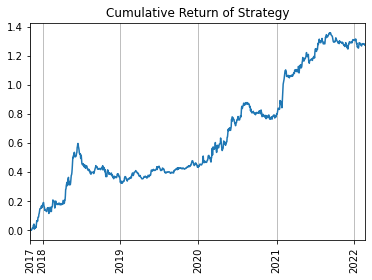

In [228]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0
# alpha_df[np.in1d(day_of_week_v, [1,2,3,4])] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [161]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  37.41772995418475
Tue median return (in bps):  5.679052292327014
Wed median return (in bps):  -0.41839557265990485
Thu median return (in bps):  13.558730684558553
Fri median return (in bps):  -3.516994762802472


* combine signal

Number of backtest days:  1076
Trading frequency:  94.14%
Annualized return:  46.33%
Annualized volatility: 17.68%
Annualized Sharpe: 2.62
Hit Ratio: 0.55
Max Drawdown: 11.29%
Average profit per trade before cost: 0.23%
Average profit per trade after cost: 0.20%


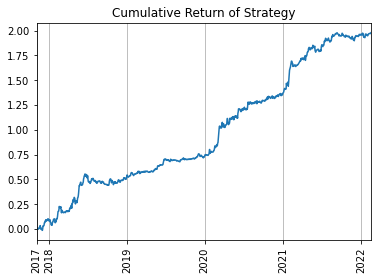

In [233]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
signal_return_df1 = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df1 = np.sign(signal_return_df1)
alpha_df[np.in1d(day_of_week_v, [0,3])] = alpha_df1[np.in1d(day_of_week_v, [0,3])]

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [235]:
pnl_v.mean() * 1e4

18.38352998860344

In [238]:
pnl_v.max() * 1e2

5.09166380420781

In [242]:
dates_v[pnl_v == pnl_v.max()]

array([20210119], dtype=int64)

In [239]:
pnl_v.min() * 1e2

-4.408704273389955

In [230]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  38.882184930488066
Tue median return (in bps):  12.285953855259068
Wed median return (in bps):  12.03060273291891
Thu median return (in bps):  14.699283679950252
Fri median return (in bps):  14.510005160584845


Number of backtest days:  1076
Trading frequency:  70.26%
Annualized return:  37.60%
Annualized volatility: 15.30%
Annualized Sharpe: 2.46
Hit Ratio: 0.57
Max Drawdown: 15.05%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.21%


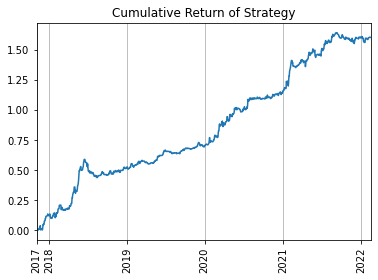

In [259]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
signal_return_df1 = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df1 = np.sign(signal_return_df1)
alpha_df = (alpha_df + alpha_df1)/ 2

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [260]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  37.162689267980795
Tue median return (in bps):  10.676051460889818
Wed median return (in bps):  7.3956384638504336
Thu median return (in bps):  12.431660974657728
Fri median return (in bps):  7.438634828520819


* only trade if intraday trend is strong 

Number of backtest days:  1076
Trading frequency:  80.58%
Annualized return:  41.40%
Annualized volatility: 16.99%
Annualized Sharpe: 2.44
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


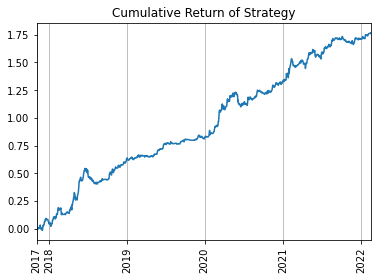

In [337]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1

alpha_df = np.sign(signal_return_df)
lower_thred = 5
alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

Number of backtest days:  1076
Trading frequency:  86.25%
Annualized return:  49.32%
Annualized volatility: 17.72%
Annualized Sharpe: 2.78
Hit Ratio: 0.57
Max Drawdown: 11.65%
Average profit per trade before cost: 0.26%
Average profit per trade after cost: 0.23%


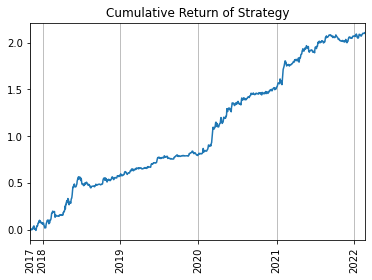

In [342]:
signal_time = 1000

signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
lower_thred = 5
alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

signal_return_df1 = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df1 = np.sign(signal_return_df1)
lower_thred1 = 5
alpha_df1[signal_return_df1.abs() <= (lower_thred1/1e4)] = 0

alpha_df[np.in1d(day_of_week_v, [0,3])] = alpha_df1[np.in1d(day_of_week_v, [0,3])]

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
# alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

Number of backtest days:  1076
Trading frequency:  80.11%
Annualized return:  41.13%
Annualized volatility: 15.54%
Annualized Sharpe: 2.65
Hit Ratio: 0.56
Max Drawdown: 17.39%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


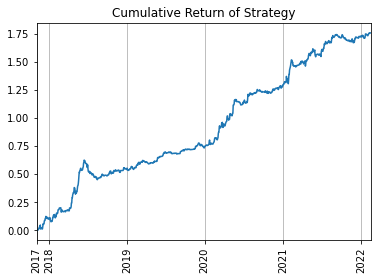

In [343]:
signal_time = 1000

signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
lower_thred = 5
alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

signal_return_df1 = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df1 = np.sign(signal_return_df1)
lower_thred1 = 5
alpha_df1[signal_return_df1.abs() <= (lower_thred1/1e4)] = 0

alpha_df = (alpha_df + alpha_df1)/ 2

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
# alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [347]:
print('Open to 10am')
print('Mon median return (in bps): ', np.nanmedian(signal_return_df[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.nanmedian(signal_return_df[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.nanmedian(signal_return_df[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.nanmedian(signal_return_df[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.nanmedian(signal_return_df[day_of_week_v == 4]) * 1e4)

Open to 10am
Mon median return (in bps):  4.490345756622549
Tue median return (in bps):  2.1675517502983688
Wed median return (in bps):  7.7459333849727585
Thu median return (in bps):  4.566210045662267
Fri median return (in bps):  1.0685612626581964


In [348]:
print('Prev close to 10am')
print('Mon median return (in bps): ', np.nanmedian(signal_return_df1[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.nanmedian(signal_return_df1[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.nanmedian(signal_return_df1[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.nanmedian(signal_return_df1[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.nanmedian(signal_return_df1[day_of_week_v == 4]) * 1e4)

Prev close to 10am
Mon median return (in bps):  12.476333752929891
Tue median return (in bps):  7.570659488560505
Wed median return (in bps):  12.706480304955914
Thu median return (in bps):  6.586169045006418
Fri median return (in bps):  3.965210416824183


300
Number of backtest days:  1076
Trading frequency:  80.39%
Annualized return:  40.65%
Annualized volatility: 16.82%
Annualized Sharpe: 2.42
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


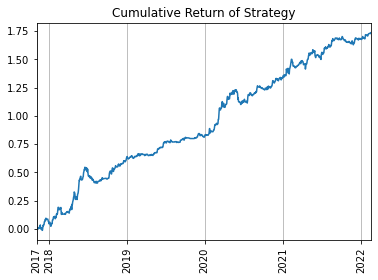

400
Number of backtest days:  1076
Trading frequency:  80.48%
Annualized return:  40.27%
Annualized volatility: 16.84%
Annualized Sharpe: 2.39
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.23%
Average profit per trade after cost: 0.20%


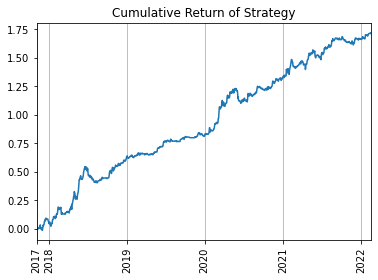

500
Number of backtest days:  1076
Trading frequency:  80.58%
Annualized return:  41.40%
Annualized volatility: 16.99%
Annualized Sharpe: 2.44
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


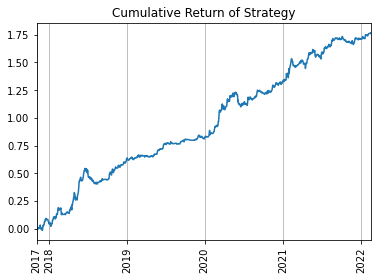

600
Number of backtest days:  1076
Trading frequency:  80.58%
Annualized return:  41.40%
Annualized volatility: 16.99%
Annualized Sharpe: 2.44
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


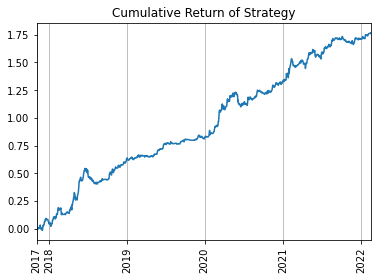

700
Number of backtest days:  1076
Trading frequency:  80.58%
Annualized return:  41.40%
Annualized volatility: 16.99%
Annualized Sharpe: 2.44
Hit Ratio: 0.56
Max Drawdown: 13.98%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


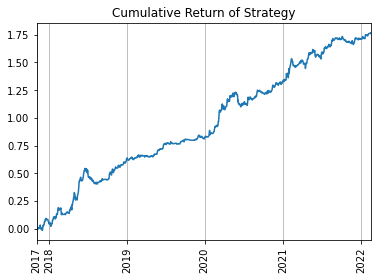

In [473]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1

for upper_thred in [300, 400, 500, 600, 700]:
    print(upper_thred)
    alpha_df = np.sign(signal_return_df)
    lower_thred = 5
    alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0
    alpha_df[signal_return_df.abs() >= (upper_thred/1e4)] = 0

    idx = valid_time.index(signal_time)
    exec_interval = 1
    trade_time = valid_time[idx + exec_interval]
    realized_return_df = close_df[1500]/ close_df[trade_time] - 1
    alpha_df[~np.isfinite(alpha_df)] = 0
    alpha_df[is_roll_day] = 0

    start_date = None
    end_date = None

    if start_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index > start_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
    if end_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index < end_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

    pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
    simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [300]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  36.385509628842286
Tue median return (in bps):  12.99728409905349
Wed median return (in bps):  11.263210310044508
Thu median return (in bps):  18.027602138938544
Fri median return (in bps):  12.428728544249047


In [265]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
signal_return_v = signal_return_df.values

In [266]:
print('Mon median return (in bps): ', np.mean(signal_return_v[day_of_week_v == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(signal_return_v[day_of_week_v == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(signal_return_v[day_of_week_v == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(signal_return_v[day_of_week_v == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(signal_return_v[day_of_week_v == 4]) * 1e4)

Mon median return (in bps):  2.4353342172301575
Tue median return (in bps):  1.7328819198492007
Wed median return (in bps):  7.184361473564416
Thu median return (in bps):  0.6261325766007648
Fri median return (in bps):  6.2146853598657765


In [269]:
print('Mon max return (in bps): ', np.max(signal_return_v[day_of_week_v == 0]) * 1e4)
print('Tue max return (in bps): ', np.max(signal_return_v[day_of_week_v == 1]) * 1e4)
print('Wed max return (in bps): ', np.max(signal_return_v[day_of_week_v == 2]) * 1e4)
print('Thu max return (in bps): ', np.max(signal_return_v[day_of_week_v == 3]) * 1e4)
print('Fri max return (in bps): ', np.max(signal_return_v[day_of_week_v == 4]) * 1e4)

Mon max return (in bps):  177.22315436241587
Tue max return (in bps):  248.44720496894456
Wed max return (in bps):  157.85861358956765
Thu max return (in bps):  92.22298692360687
Fri max return (in bps):  473.30595482546255


In [270]:
print('Mon min return (in bps): ', np.min(signal_return_v[day_of_week_v == 0]) * 1e4)
print('Tue min return (in bps): ', np.min(signal_return_v[day_of_week_v == 1]) * 1e4)
print('Wed min return (in bps): ', np.min(signal_return_v[day_of_week_v == 2]) * 1e4)
print('Thu min return (in bps): ', np.min(signal_return_v[day_of_week_v == 3]) * 1e4)
print('Fri min return (in bps): ', np.min(signal_return_v[day_of_week_v == 4]) * 1e4)

Mon min return (in bps):  -286.2342819324948
Tue min return (in bps):  -247.03557312252934
Wed min return (in bps):  -328.29670329670324
Thu min return (in bps):  -209.59332638164742
Fri min return (in bps):  -96.67968749999977


In [280]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)

signal_return_m = signal_return_df.values
signal_return_m = signal_return_m[:,np.newaxis]

Days and threshold:  20 0.25
Number of backtest days:  1076
Trading frequency:  69.98%
Annualized return:  36.15%
Annualized volatility: 15.55%
Annualized Sharpe: 2.33
Hit Ratio: 0.54
Max Drawdown: 12.74%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.21%


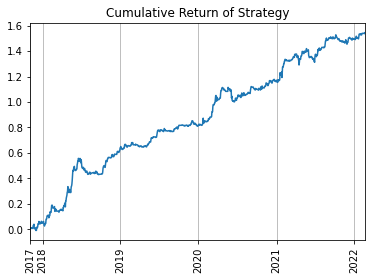

Days and threshold:  20 0.5
Number of backtest days:  1076
Trading frequency:  54.00%
Annualized return:  32.58%
Annualized volatility: 13.91%
Annualized Sharpe: 2.34
Hit Ratio: 0.56
Max Drawdown: 12.09%
Average profit per trade before cost: 0.28%
Average profit per trade after cost: 0.24%


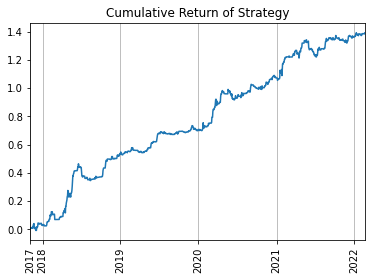

Days and threshold:  20 0.75
Number of backtest days:  1076
Trading frequency:  38.94%
Annualized return:  25.99%
Annualized volatility: 12.47%
Annualized Sharpe: 2.08
Hit Ratio: 0.57
Max Drawdown: 12.16%
Average profit per trade before cost: 0.30%
Average profit per trade after cost: 0.26%


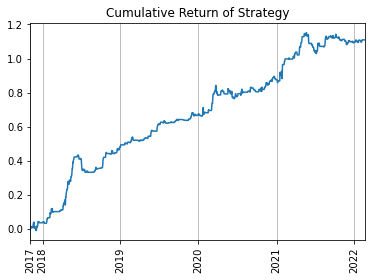

Days and threshold:  20 1.0
Number of backtest days:  1076
Trading frequency:  27.42%
Annualized return:  17.45%
Annualized volatility: 10.66%
Annualized Sharpe: 1.64
Hit Ratio: 0.58
Max Drawdown: 10.10%
Average profit per trade before cost: 0.29%
Average profit per trade after cost: 0.25%


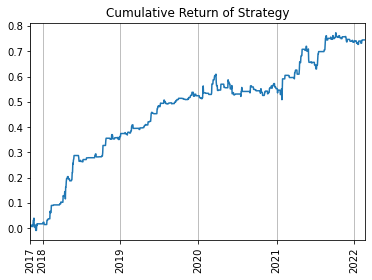

Days and threshold:  60 0.25
Number of backtest days:  1076
Trading frequency:  68.68%
Annualized return:  38.50%
Annualized volatility: 15.61%
Annualized Sharpe: 2.47
Hit Ratio: 0.55
Max Drawdown: 14.69%
Average profit per trade before cost: 0.26%
Average profit per trade after cost: 0.22%


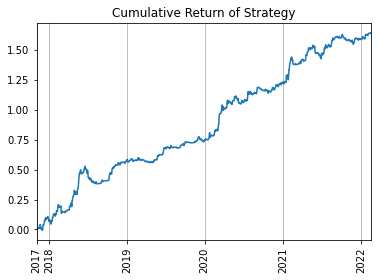

Days and threshold:  60 0.5
Number of backtest days:  1076
Trading frequency:  49.44%
Annualized return:  31.12%
Annualized volatility: 13.63%
Annualized Sharpe: 2.28
Hit Ratio: 0.56
Max Drawdown: 11.24%
Average profit per trade before cost: 0.29%
Average profit per trade after cost: 0.25%


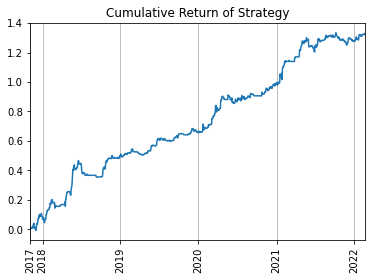

Days and threshold:  60 0.75
Number of backtest days:  1076
Trading frequency:  35.50%
Annualized return:  24.51%
Annualized volatility: 12.01%
Annualized Sharpe: 2.04
Hit Ratio: 0.59
Max Drawdown: 10.22%
Average profit per trade before cost: 0.31%
Average profit per trade after cost: 0.27%


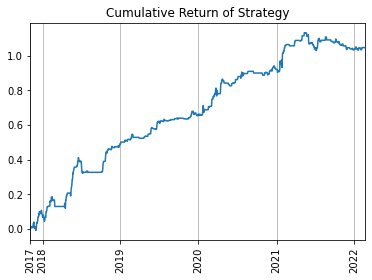

Days and threshold:  60 1.0
Number of backtest days:  1076
Trading frequency:  24.91%
Annualized return:  20.16%
Annualized volatility: 10.70%
Annualized Sharpe: 1.88
Hit Ratio: 0.62
Max Drawdown: 8.78%
Average profit per trade before cost: 0.36%
Average profit per trade after cost: 0.32%


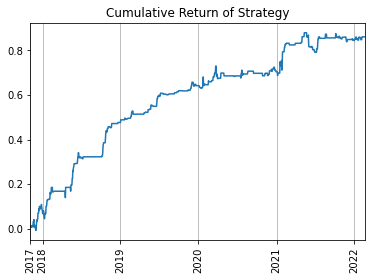

Days and threshold:  120 0.25
Number of backtest days:  1076
Trading frequency:  70.35%
Annualized return:  36.15%
Annualized volatility: 16.02%
Annualized Sharpe: 2.26
Hit Ratio: 0.55
Max Drawdown: 12.60%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


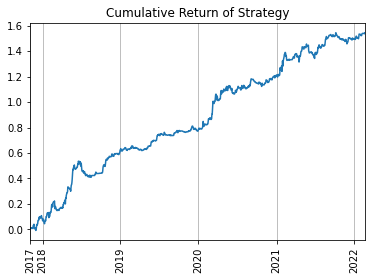

Days and threshold:  120 0.5
Number of backtest days:  1076
Trading frequency:  46.75%
Annualized return:  28.85%
Annualized volatility: 13.79%
Annualized Sharpe: 2.09
Hit Ratio: 0.58
Max Drawdown: 10.27%
Average profit per trade before cost: 0.28%
Average profit per trade after cost: 0.24%


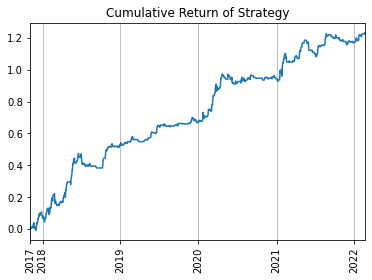

Days and threshold:  120 0.75
Number of backtest days:  1076
Trading frequency:  35.78%
Annualized return:  29.21%
Annualized volatility: 12.19%
Annualized Sharpe: 2.40
Hit Ratio: 0.61
Max Drawdown: 7.58%
Average profit per trade before cost: 0.36%
Average profit per trade after cost: 0.32%


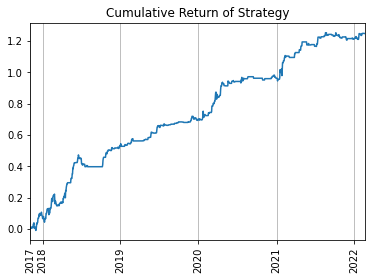

Days and threshold:  120 1.0
Number of backtest days:  1076
Trading frequency:  26.12%
Annualized return:  22.69%
Annualized volatility: 11.24%
Annualized Sharpe: 2.02
Hit Ratio: 0.61
Max Drawdown: 7.54%
Average profit per trade before cost: 0.38%
Average profit per trade after cost: 0.34%


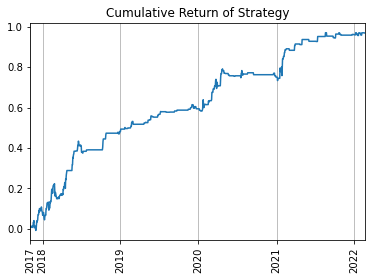

Days and threshold:  250 0.25
Number of backtest days:  1076
Trading frequency:  70.82%
Annualized return:  34.00%
Annualized volatility: 16.54%
Annualized Sharpe: 2.06
Hit Ratio: 0.56
Max Drawdown: 13.12%
Average profit per trade before cost: 0.23%
Average profit per trade after cost: 0.19%


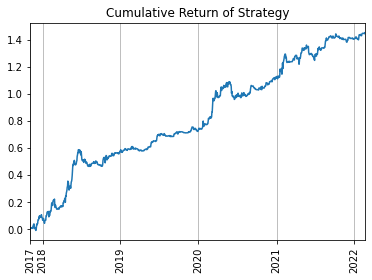

Days and threshold:  250 0.5
Number of backtest days:  1076
Trading frequency:  51.67%
Annualized return:  28.25%
Annualized volatility: 15.02%
Annualized Sharpe: 1.88
Hit Ratio: 0.57
Max Drawdown: 12.43%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.22%


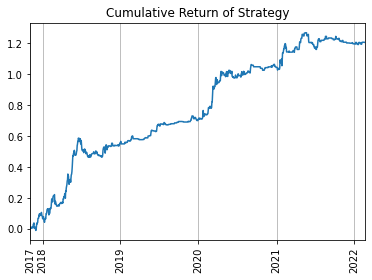

Days and threshold:  250 0.75
Number of backtest days:  1076
Trading frequency:  39.22%
Annualized return:  26.40%
Annualized volatility: 13.59%
Annualized Sharpe: 1.94
Hit Ratio: 0.59
Max Drawdown: 12.43%
Average profit per trade before cost: 0.30%
Average profit per trade after cost: 0.27%


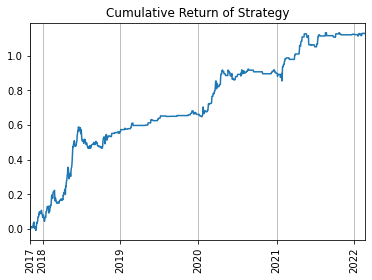

Days and threshold:  250 1.0
Number of backtest days:  1076
Trading frequency:  33.09%
Annualized return:  24.44%
Annualized volatility: 12.67%
Annualized Sharpe: 1.93
Hit Ratio: 0.60
Max Drawdown: 12.43%
Average profit per trade before cost: 0.33%
Average profit per trade after cost: 0.29%


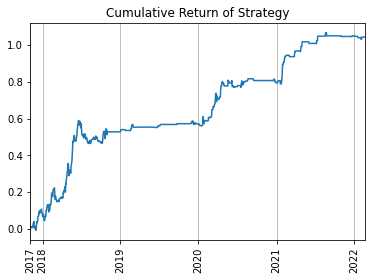

In [281]:
for days in [20, 60, 120, 250]:
    for thres in [0.25, 0.5, 0.75, 1.0]:
        print('Days and threshold: ', days, thres)
        
        alpha_df = np.sign(signal_return_df)
        
        z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, days))/ \
                        np.power(tsOp.movingVariance(signal_return_m, days), 0.5)
        z_score_v = z_score_v.flatten()
        
        alpha_df[np.bitwise_and(alpha_df > 0, z_score_v < thres)] = 0
        alpha_df[np.bitwise_and(alpha_df < 0, z_score_v > -thres)] = 0
        
        idx = valid_time.index(signal_time)
        exec_interval = 1
        trade_time = valid_time[idx + exec_interval]
        realized_return_df = close_df[1500]/ close_df[trade_time] - 1
        alpha_df[~np.isfinite(alpha_df)] = 0
        alpha_df[is_roll_day] = 0

        start_date = None
        end_date = None

        if start_date is not None:
            alpha_df = alpha_df.loc[alpha_df.index > start_date]
            realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
        if end_date is not None:
            alpha_df = alpha_df.loc[alpha_df.index < end_date]
            realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

        pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
        simOp.show_strategy_plot(pnl_v, alpha_df.index)

Number of backtest days:  1076
Trading frequency:  69.98%
Annualized return:  36.15%
Annualized volatility: 15.55%
Annualized Sharpe: 2.33
Hit Ratio: 0.54
Max Drawdown: 12.74%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.21%


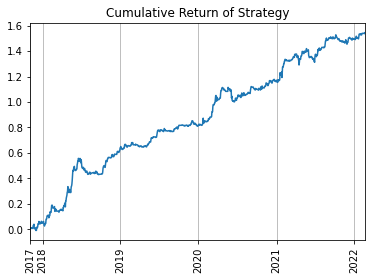

In [282]:
alpha_df = np.sign(signal_return_df)

days = 20
thres = 0.25
z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, days))/ \
                np.power(tsOp.movingVariance(signal_return_m, days), 0.5)
z_score_v = z_score_v.flatten()

alpha_df[np.bitwise_and(alpha_df > 0, z_score_v < thres)] = 0
alpha_df[np.bitwise_and(alpha_df < 0, z_score_v > -thres)] = 0

idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

0
Number of backtest days:  1076
Trading frequency:  19.14%
Annualized return:  19.21%
Annualized volatility: 9.38%
Annualized Sharpe: 2.05
Hit Ratio: 0.66
Max Drawdown: 7.76%
Average profit per trade before cost: 0.44%
Average profit per trade after cost: 0.40%


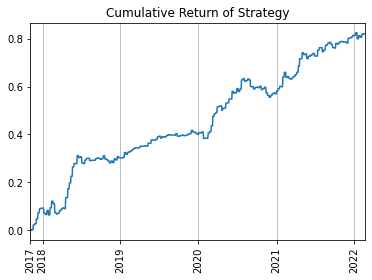

1
Number of backtest days:  1076
Trading frequency:  19.52%
Annualized return:  3.62%
Annualized volatility: 8.05%
Annualized Sharpe: 0.45
Hit Ratio: 0.50
Max Drawdown: 10.74%
Average profit per trade before cost: 0.11%
Average profit per trade after cost: 0.07%


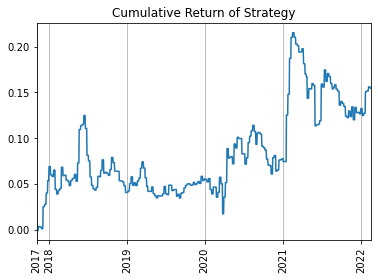

2
Number of backtest days:  1076
Trading frequency:  19.80%
Annualized return:  0.54%
Annualized volatility: 7.41%
Annualized Sharpe: 0.07
Hit Ratio: 0.48
Max Drawdown: 12.15%
Average profit per trade before cost: 0.05%
Average profit per trade after cost: 0.01%


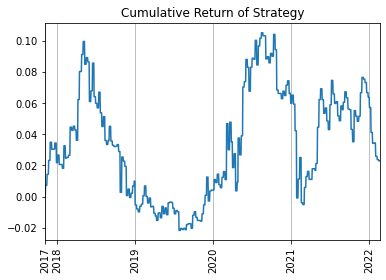

3
Number of backtest days:  1076
Trading frequency:  15.33%
Annualized return:  7.47%
Annualized volatility: 7.10%
Annualized Sharpe: 1.05
Hit Ratio: 0.56
Max Drawdown: 5.56%
Average profit per trade before cost: 0.23%
Average profit per trade after cost: 0.19%


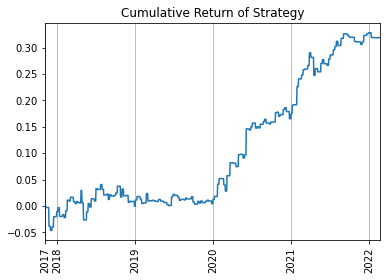

4
Number of backtest days:  1076
Trading frequency:  19.89%
Annualized return:  -1.03%
Annualized volatility: 7.74%
Annualized Sharpe: -0.13
Hit Ratio: 0.49
Max Drawdown: 21.07%
Average profit per trade before cost: 0.01%
Average profit per trade after cost: -0.02%


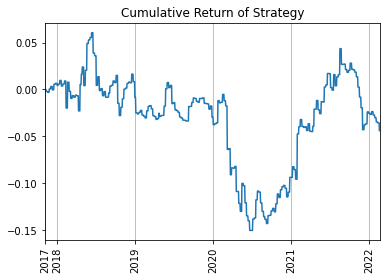

In [359]:
signal_time = 1000
signal_return_df_ = close_df[signal_time]/ close_df[1500].shift(1) - 1
for day in [0,1,2,3,4]:
    print(day)
    signal_return_df = signal_return_df_.copy()
    signal_return_df[day_of_week_v != day] = np.nan
    alpha_df = np.sign(signal_return_df)
    
    idx = valid_time.index(signal_time)
    exec_interval = 1
    trade_time = valid_time[idx + exec_interval]
    realized_return_df = close_df[1500]/ close_df[trade_time] - 1
    alpha_df[~np.isfinite(alpha_df)] = 0
    alpha_df[is_roll_day] = 0

    start_date = None
    end_date = None

    if start_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index > start_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
    if end_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index < end_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

    pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
    simOp.show_strategy_plot(pnl_v, alpha_df.index)

0
Number of backtest days:  1076
Trading frequency:  19.42%
Annualized return:  17.03%
Annualized volatility: 9.42%
Annualized Sharpe: 1.81
Hit Ratio: 0.65
Max Drawdown: 6.56%
Average profit per trade before cost: 0.38%
Average profit per trade after cost: 0.35%


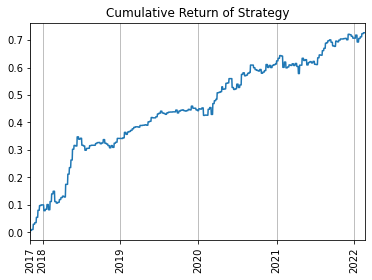

1
Number of backtest days:  1076
Trading frequency:  19.89%
Annualized return:  6.24%
Annualized volatility: 8.05%
Annualized Sharpe: 0.78
Hit Ratio: 0.51
Max Drawdown: 9.05%
Average profit per trade before cost: 0.16%
Average profit per trade after cost: 0.12%


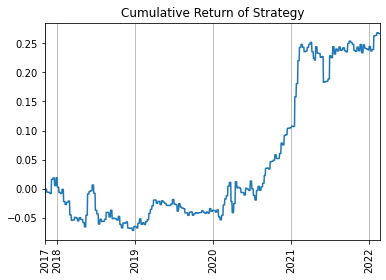

2
Number of backtest days:  1076
Trading frequency:  19.80%
Annualized return:  6.06%
Annualized volatility: 7.53%
Annualized Sharpe: 0.80
Hit Ratio: 0.52
Max Drawdown: 7.84%
Average profit per trade before cost: 0.16%
Average profit per trade after cost: 0.12%


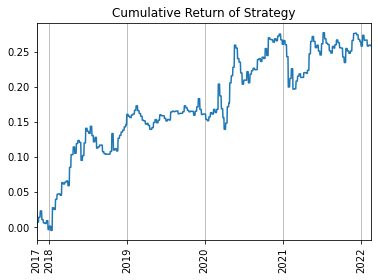

3
Number of backtest days:  1076
Trading frequency:  15.15%
Annualized return:  4.46%
Annualized volatility: 6.93%
Annualized Sharpe: 0.64
Hit Ratio: 0.53
Max Drawdown: 5.44%
Average profit per trade before cost: 0.15%
Average profit per trade after cost: 0.12%


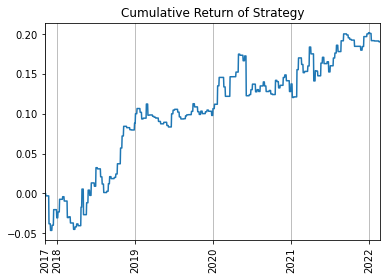

4
Number of backtest days:  1076
Trading frequency:  19.98%
Annualized return:  7.34%
Annualized volatility: 7.68%
Annualized Sharpe: 0.96
Hit Ratio: 0.53
Max Drawdown: 10.14%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.15%


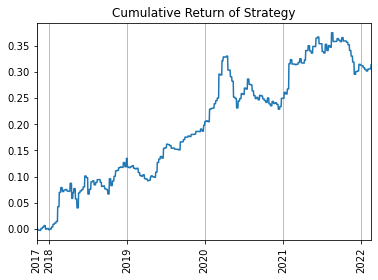

In [358]:
signal_time = 1000
signal_return_df_ = close_df[signal_time]/ open_df[930] - 1
for day in [0,1,2,3,4]:
    print(day)
    signal_return_df = signal_return_df_.copy()
    signal_return_df[day_of_week_v != day] = np.nan
    alpha_df = np.sign(signal_return_df)
    
    idx = valid_time.index(signal_time)
    exec_interval = 1
    trade_time = valid_time[idx + exec_interval]
    realized_return_df = close_df[1500]/ close_df[trade_time] - 1
    alpha_df[~np.isfinite(alpha_df)] = 0
    alpha_df[is_roll_day] = 0

    start_date = None
    end_date = None

    if start_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index > start_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
    if end_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index < end_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

    pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
    simOp.show_strategy_plot(pnl_v, alpha_df.index)

0 60 0.5
Number of backtest days:  1076
Trading frequency:  11.15%
Annualized return:  12.02%
Annualized volatility: 7.28%
Annualized Sharpe: 1.65
Hit Ratio: 0.68
Max Drawdown: 4.48%
Average profit per trade before cost: 0.47%
Average profit per trade after cost: 0.43%


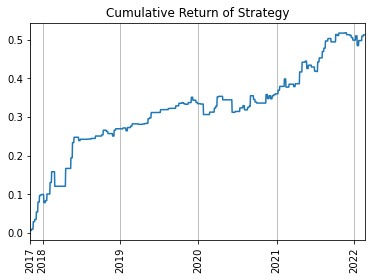

0 60 0.75
Number of backtest days:  1076
Trading frequency:  8.36%
Annualized return:  10.87%
Annualized volatility: 6.23%
Annualized Sharpe: 1.74
Hit Ratio: 0.72
Max Drawdown: 3.77%
Average profit per trade before cost: 0.56%
Average profit per trade after cost: 0.52%


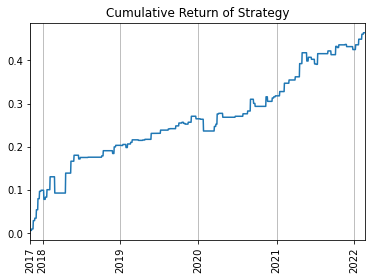

0 60 1
Number of backtest days:  1076
Trading frequency:  6.04%
Annualized return:  10.82%
Annualized volatility: 5.48%
Annualized Sharpe: 1.98
Hit Ratio: 0.82
Max Drawdown: 3.42%
Average profit per trade before cost: 0.76%
Average profit per trade after cost: 0.71%


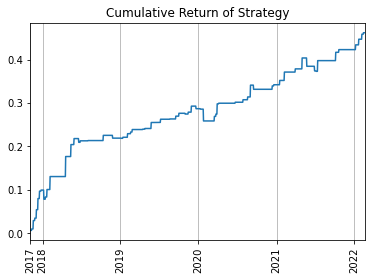

0 120 0.5
Number of backtest days:  1076
Trading frequency:  10.69%
Annualized return:  12.12%
Annualized volatility: 7.22%
Annualized Sharpe: 1.68
Hit Ratio: 0.70
Max Drawdown: 5.48%
Average profit per trade before cost: 0.49%
Average profit per trade after cost: 0.45%


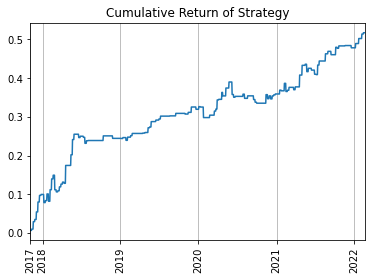

0 120 0.75
Number of backtest days:  1076
Trading frequency:  7.81%
Annualized return:  10.87%
Annualized volatility: 6.43%
Annualized Sharpe: 1.69
Hit Ratio: 0.76
Max Drawdown: 4.31%
Average profit per trade before cost: 0.59%
Average profit per trade after cost: 0.55%


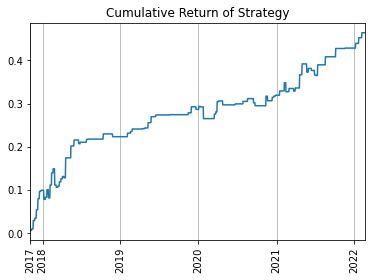

0 120 1
Number of backtest days:  1076
Trading frequency:  6.04%
Annualized return:  9.83%
Annualized volatility: 6.02%
Annualized Sharpe: 1.63
Hit Ratio: 0.78
Max Drawdown: 4.31%
Average profit per trade before cost: 0.68%
Average profit per trade after cost: 0.65%


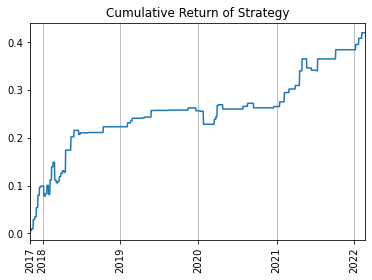

1 60 0.5
Number of backtest days:  1076
Trading frequency:  11.52%
Annualized return:  7.20%
Annualized volatility: 7.03%
Annualized Sharpe: 1.02
Hit Ratio: 0.52
Max Drawdown: 5.18%
Average profit per trade before cost: 0.28%
Average profit per trade after cost: 0.25%


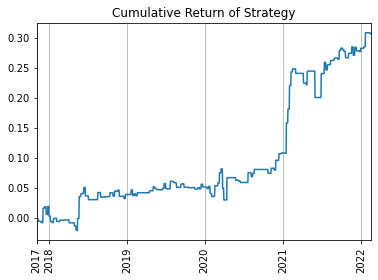

1 60 0.75
Number of backtest days:  1076
Trading frequency:  8.74%
Annualized return:  6.11%
Annualized volatility: 6.59%
Annualized Sharpe: 0.93
Hit Ratio: 0.54
Max Drawdown: 5.18%
Average profit per trade before cost: 0.31%
Average profit per trade after cost: 0.28%


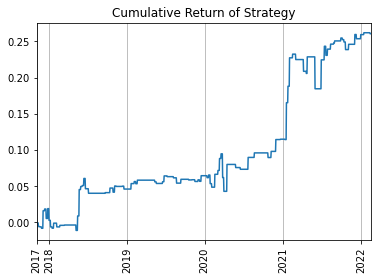

1 60 1
Number of backtest days:  1076
Trading frequency:  6.60%
Annualized return:  5.35%
Annualized volatility: 6.15%
Annualized Sharpe: 0.87
Hit Ratio: 0.55
Max Drawdown: 5.41%
Average profit per trade before cost: 0.36%
Average profit per trade after cost: 0.32%


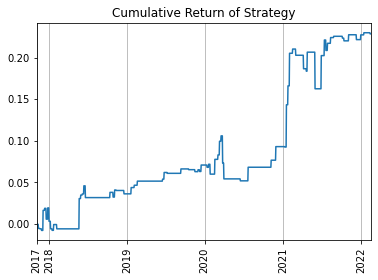

1 120 0.5
Number of backtest days:  1076
Trading frequency:  11.34%
Annualized return:  4.32%
Annualized volatility: 6.95%
Annualized Sharpe: 0.62
Hit Ratio: 0.52
Max Drawdown: 7.41%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.15%


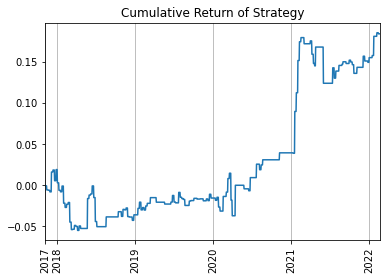

1 120 0.75
Number of backtest days:  1076
Trading frequency:  8.27%
Annualized return:  3.39%
Annualized volatility: 6.40%
Annualized Sharpe: 0.53
Hit Ratio: 0.52
Max Drawdown: 7.41%
Average profit per trade before cost: 0.20%
Average profit per trade after cost: 0.16%


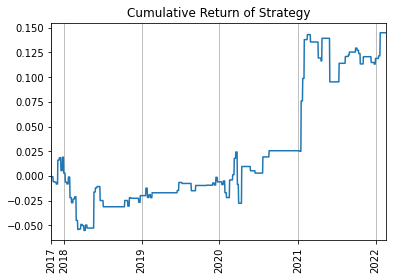

1 120 1
Number of backtest days:  1076
Trading frequency:  6.51%
Annualized return:  2.67%
Annualized volatility: 6.22%
Annualized Sharpe: 0.43
Hit Ratio: 0.50
Max Drawdown: 7.41%
Average profit per trade before cost: 0.20%
Average profit per trade after cost: 0.16%


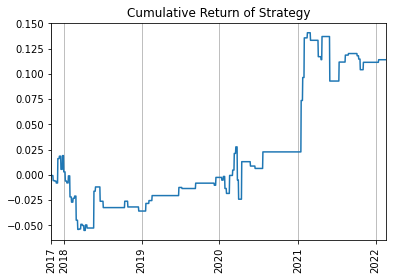

2 60 0.5
Number of backtest days:  1076
Trading frequency:  10.97%
Annualized return:  4.23%
Annualized volatility: 6.01%
Annualized Sharpe: 0.70
Hit Ratio: 0.53
Max Drawdown: 7.42%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.15%


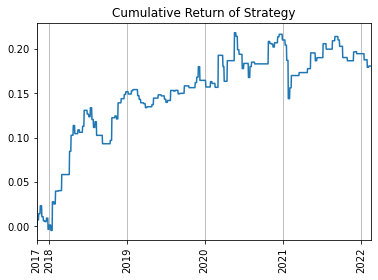

2 60 0.75
Number of backtest days:  1076
Trading frequency:  8.74%
Annualized return:  4.92%
Annualized volatility: 5.70%
Annualized Sharpe: 0.86
Hit Ratio: 0.56
Max Drawdown: 6.67%
Average profit per trade before cost: 0.26%
Average profit per trade after cost: 0.22%


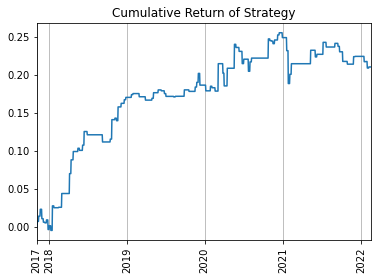

2 60 1
Number of backtest days:  1076
Trading frequency:  6.97%
Annualized return:  5.19%
Annualized volatility: 4.81%
Annualized Sharpe: 1.08
Hit Ratio: 0.56
Max Drawdown: 4.40%
Average profit per trade before cost: 0.33%
Average profit per trade after cost: 0.30%


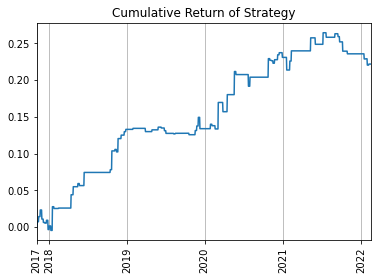

2 120 0.5
Number of backtest days:  1076
Trading frequency:  10.50%
Annualized return:  3.04%
Annualized volatility: 6.00%
Annualized Sharpe: 0.51
Hit Ratio: 0.54
Max Drawdown: 9.62%
Average profit per trade before cost: 0.15%
Average profit per trade after cost: 0.11%


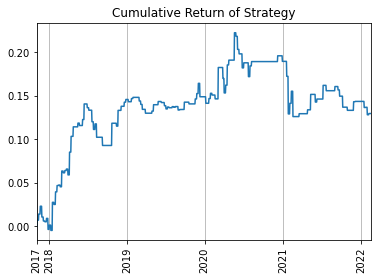

2 120 0.75
Number of backtest days:  1076
Trading frequency:  7.71%
Annualized return:  3.36%
Annualized volatility: 5.27%
Annualized Sharpe: 0.64
Hit Ratio: 0.54
Max Drawdown: 9.56%
Average profit per trade before cost: 0.21%
Average profit per trade after cost: 0.17%


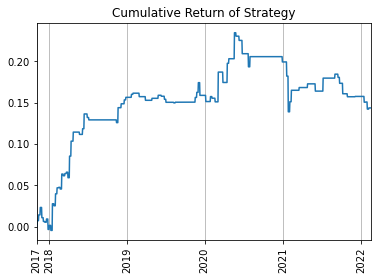

2 120 1
Number of backtest days:  1076
Trading frequency:  6.04%
Annualized return:  4.60%
Annualized volatility: 4.61%
Annualized Sharpe: 1.00
Hit Ratio: 0.55
Max Drawdown: 3.72%
Average profit per trade before cost: 0.34%
Average profit per trade after cost: 0.30%


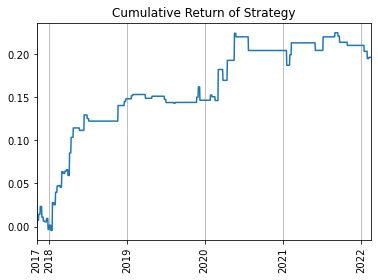

3 60 0.5
Number of backtest days:  1076
Trading frequency:  9.01%
Annualized return:  4.65%
Annualized volatility: 5.61%
Annualized Sharpe: 0.83
Hit Ratio: 0.52
Max Drawdown: 5.11%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


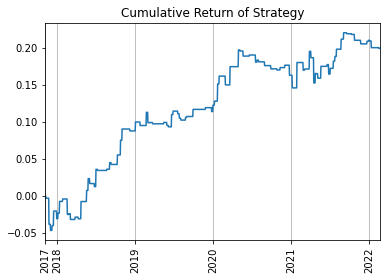

3 60 0.75
Number of backtest days:  1076
Trading frequency:  6.97%
Annualized return:  2.59%
Annualized volatility: 5.10%
Annualized Sharpe: 0.51
Hit Ratio: 0.49
Max Drawdown: 5.00%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.15%


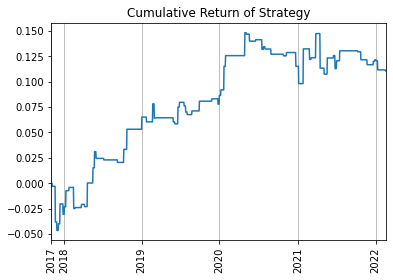

3 60 1
Number of backtest days:  1076
Trading frequency:  5.02%
Annualized return:  1.96%
Annualized volatility: 4.28%
Annualized Sharpe: 0.46
Hit Ratio: 0.48
Max Drawdown: 4.64%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.16%


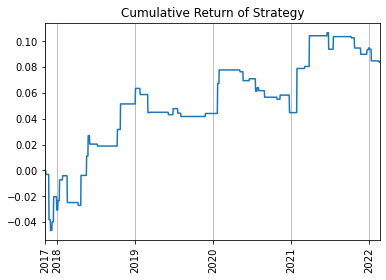

3 120 0.5
Number of backtest days:  1076
Trading frequency:  9.29%
Annualized return:  3.58%
Annualized volatility: 5.57%
Annualized Sharpe: 0.64
Hit Ratio: 0.49
Max Drawdown: 4.83%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.15%


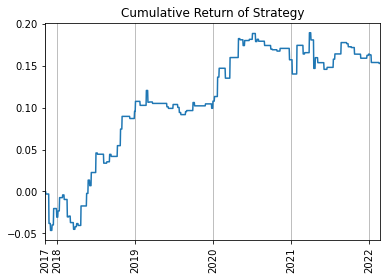

3 120 0.75
Number of backtest days:  1076
Trading frequency:  7.16%
Annualized return:  2.77%
Annualized volatility: 5.20%
Annualized Sharpe: 0.53
Hit Ratio: 0.51
Max Drawdown: 4.64%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.15%


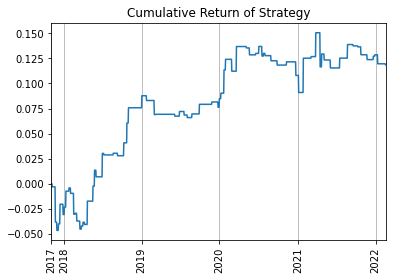

3 120 1
Number of backtest days:  1076
Trading frequency:  4.74%
Annualized return:  2.41%
Annualized volatility: 4.48%
Annualized Sharpe: 0.54
Hit Ratio: 0.51
Max Drawdown: 4.66%
Average profit per trade before cost: 0.24%
Average profit per trade after cost: 0.20%


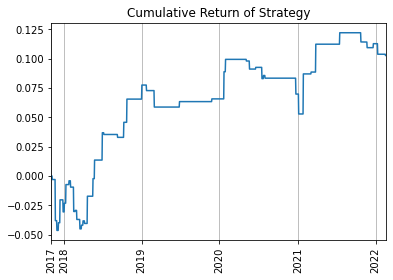

4 60 0.5
Number of backtest days:  1076
Trading frequency:  11.90%
Annualized return:  5.59%
Annualized volatility: 6.70%
Annualized Sharpe: 0.83
Hit Ratio: 0.53
Max Drawdown: 6.00%
Average profit per trade before cost: 0.22%
Average profit per trade after cost: 0.19%


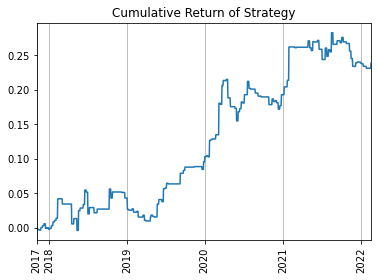

4 60 0.75
Number of backtest days:  1076
Trading frequency:  8.36%
Annualized return:  4.57%
Annualized volatility: 5.82%
Annualized Sharpe: 0.79
Hit Ratio: 0.54
Max Drawdown: 3.88%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.22%


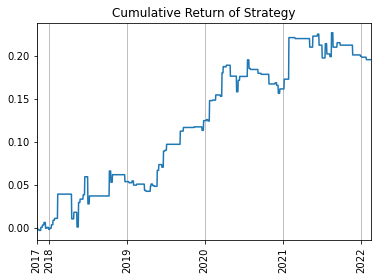

4 60 1
Number of backtest days:  1076
Trading frequency:  6.04%
Annualized return:  3.78%
Annualized volatility: 5.24%
Annualized Sharpe: 0.72
Hit Ratio: 0.60
Max Drawdown: 4.64%
Average profit per trade before cost: 0.28%
Average profit per trade after cost: 0.25%


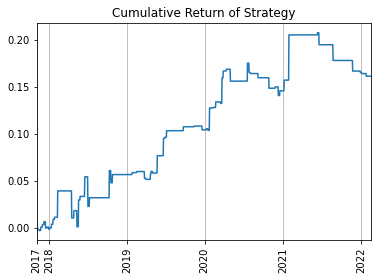

4 120 0.5
Number of backtest days:  1076
Trading frequency:  10.78%
Annualized return:  5.69%
Annualized volatility: 6.62%
Annualized Sharpe: 0.86
Hit Ratio: 0.53
Max Drawdown: 6.60%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.21%


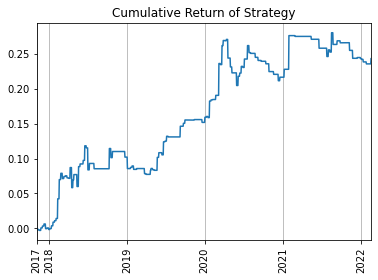

4 120 0.75
Number of backtest days:  1076
Trading frequency:  7.62%
Annualized return:  5.24%
Annualized volatility: 5.92%
Annualized Sharpe: 0.88
Hit Ratio: 0.60
Max Drawdown: 6.60%
Average profit per trade before cost: 0.31%
Average profit per trade after cost: 0.27%


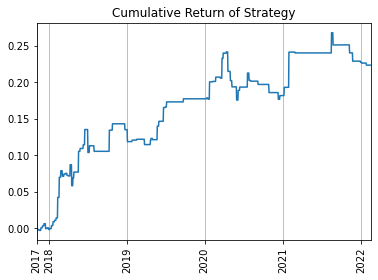

4 120 1
Number of backtest days:  1076
Trading frequency:  6.04%
Annualized return:  6.72%
Annualized volatility: 5.42%
Annualized Sharpe: 1.24
Hit Ratio: 0.66
Max Drawdown: 3.15%
Average profit per trade before cost: 0.48%
Average profit per trade after cost: 0.44%


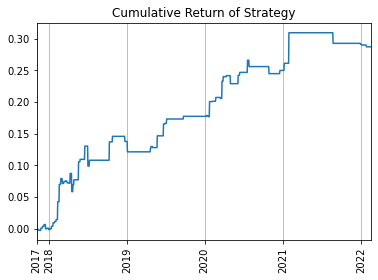

In [356]:
for day in [0,1,2,3,4]:
    signal_return_df = signal_return_df_.copy()
    signal_return_df[day_of_week_v != day] = np.nan
    signal_return_m = signal_return_df.values
    signal_return_m = signal_return_m[:,np.newaxis]

    for days in [60, 120]:
        for thres in [0.5, 0.75, 1]:
            print(day, days, thres)
            z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, days))/ \
                            np.power(tsOp.movingVariance(signal_return_m, days), 0.5)
            z_score_v = z_score_v.flatten()

            alpha_df = np.sign(signal_return_df)
            alpha_df[np.bitwise_and(alpha_df > 0, z_score_v < thres)] = 0
            alpha_df[np.bitwise_and(alpha_df < 0, z_score_v > -thres)] = 0

            idx = valid_time.index(signal_time)
            exec_interval = 1
            trade_time = valid_time[idx + exec_interval]
            realized_return_df = close_df[1500]/ close_df[trade_time] - 1
            alpha_df[~np.isfinite(alpha_df)] = 0
            alpha_df[is_roll_day] = 0

            start_date = None
            end_date = None

            if start_date is not None:
                alpha_df = alpha_df.loc[alpha_df.index > start_date]
                realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
            if end_date is not None:
                alpha_df = alpha_df.loc[alpha_df.index < end_date]
                realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

            pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
            simOp.show_strategy_plot(pnl_v, alpha_df.index)

0 1
Number of backtest days:  1076
Trading frequency:  19.33%
Annualized return:  17.15%
Annualized volatility: 9.41%
Annualized Sharpe: 1.82
Hit Ratio: 0.65
Max Drawdown: 6.56%
Average profit per trade before cost: 0.39%
Average profit per trade after cost: 0.35%


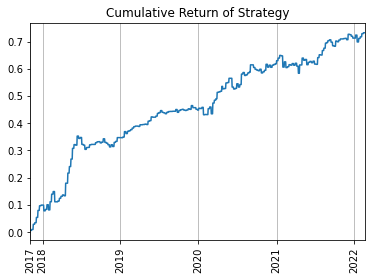

0 5
Number of backtest days:  1076
Trading frequency:  16.64%
Annualized return:  17.98%
Annualized volatility: 8.97%
Annualized Sharpe: 2.01
Hit Ratio: 0.66
Max Drawdown: 4.88%
Average profit per trade before cost: 0.47%
Average profit per trade after cost: 0.43%


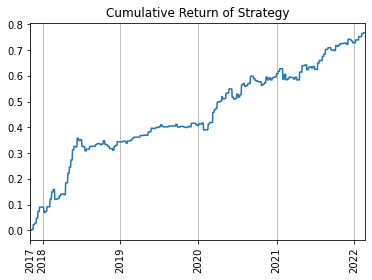

0 10
Number of backtest days:  1076
Trading frequency:  13.75%
Annualized return:  15.67%
Annualized volatility: 8.55%
Annualized Sharpe: 1.83
Hit Ratio: 0.67
Max Drawdown: 4.88%
Average profit per trade before cost: 0.49%
Average profit per trade after cost: 0.45%


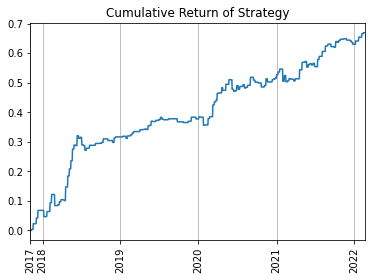

1 1
Number of backtest days:  1076
Trading frequency:  19.80%
Annualized return:  6.39%
Annualized volatility: 8.04%
Annualized Sharpe: 0.79
Hit Ratio: 0.52
Max Drawdown: 9.05%
Average profit per trade before cost: 0.16%
Average profit per trade after cost: 0.13%


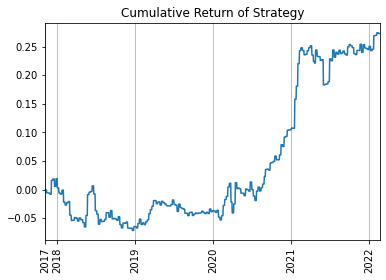

1 5
Number of backtest days:  1076
Trading frequency:  16.64%
Annualized return:  6.61%
Annualized volatility: 7.80%
Annualized Sharpe: 0.85
Hit Ratio: 0.53
Max Drawdown: 9.21%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.16%


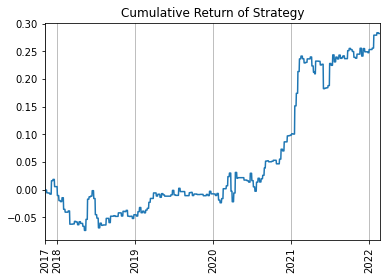

1 10
Number of backtest days:  1076
Trading frequency:  13.57%
Annualized return:  5.72%
Annualized volatility: 7.60%
Annualized Sharpe: 0.75
Hit Ratio: 0.53
Max Drawdown: 9.26%
Average profit per trade before cost: 0.20%
Average profit per trade after cost: 0.17%


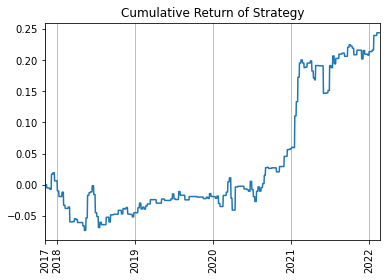

2 1
Number of backtest days:  1076
Trading frequency:  19.61%
Annualized return:  6.11%
Annualized volatility: 7.53%
Annualized Sharpe: 0.81
Hit Ratio: 0.52
Max Drawdown: 7.84%
Average profit per trade before cost: 0.16%
Average profit per trade after cost: 0.12%


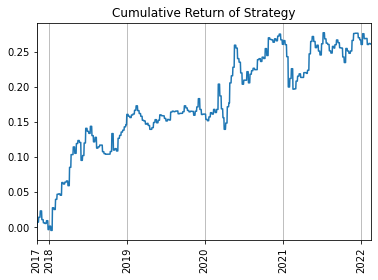

2 5
Number of backtest days:  1076
Trading frequency:  17.29%
Annualized return:  5.67%
Annualized volatility: 7.28%
Annualized Sharpe: 0.78
Hit Ratio: 0.54
Max Drawdown: 7.84%
Average profit per trade before cost: 0.17%
Average profit per trade after cost: 0.13%


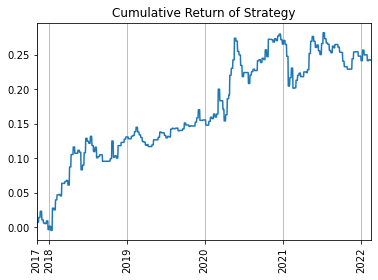

2 10
Number of backtest days:  1076
Trading frequency:  14.03%
Annualized return:  4.16%
Annualized volatility: 6.93%
Annualized Sharpe: 0.60
Hit Ratio: 0.52
Max Drawdown: 7.56%
Average profit per trade before cost: 0.15%
Average profit per trade after cost: 0.12%


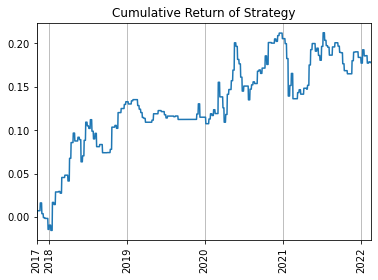

3 1
Number of backtest days:  1076
Trading frequency:  15.06%
Annualized return:  4.46%
Annualized volatility: 6.93%
Annualized Sharpe: 0.64
Hit Ratio: 0.52
Max Drawdown: 5.44%
Average profit per trade before cost: 0.15%
Average profit per trade after cost: 0.12%


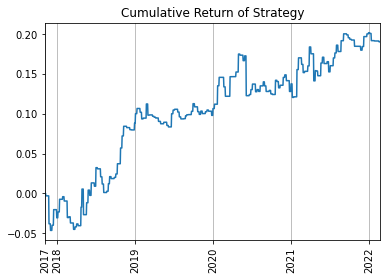

3 5
Number of backtest days:  1076
Trading frequency:  13.57%
Annualized return:  4.86%
Annualized volatility: 6.86%
Annualized Sharpe: 0.71
Hit Ratio: 0.53
Max Drawdown: 6.14%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.14%


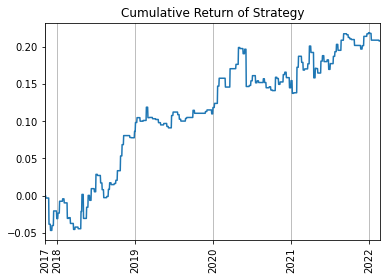

3 10
Number of backtest days:  1076
Trading frequency:  11.25%
Annualized return:  4.61%
Annualized volatility: 6.38%
Annualized Sharpe: 0.72
Hit Ratio: 0.54
Max Drawdown: 5.23%
Average profit per trade before cost: 0.20%
Average profit per trade after cost: 0.16%


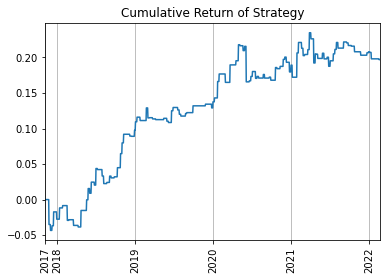

4 1
Number of backtest days:  1076
Trading frequency:  19.89%
Annualized return:  7.27%
Annualized volatility: 7.68%
Annualized Sharpe: 0.95
Hit Ratio: 0.52
Max Drawdown: 10.14%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.15%


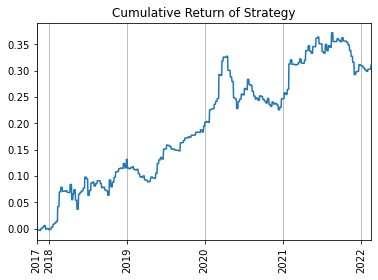

4 5
Number of backtest days:  1076
Trading frequency:  16.45%
Annualized return:  6.29%
Annualized volatility: 7.24%
Annualized Sharpe: 0.87
Hit Ratio: 0.53
Max Drawdown: 9.90%
Average profit per trade before cost: 0.19%
Average profit per trade after cost: 0.15%


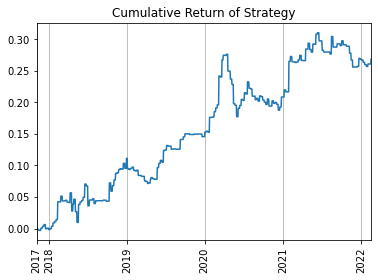

4 10
Number of backtest days:  1076
Trading frequency:  13.38%
Annualized return:  4.85%
Annualized volatility: 6.98%
Annualized Sharpe: 0.69
Hit Ratio: 0.53
Max Drawdown: 9.90%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.14%


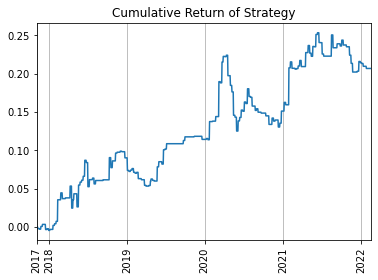

In [353]:
for day in [0,1,2,3,4]:
    signal_return_df = signal_return_df_.copy()
    signal_return_df[day_of_week_v != day] = np.nan
    signal_return_m = signal_return_df.values
    signal_return_m = signal_return_m[:,np.newaxis]
    for lower_thred in [1, 5, 10]:
        print(day, lower_thred)
        alpha_df = np.sign(signal_return_df)
        alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

        idx = valid_time.index(signal_time)
        exec_interval = 1
        trade_time = valid_time[idx + exec_interval]
        realized_return_df = close_df[1500]/ close_df[trade_time] - 1
        alpha_df[~np.isfinite(alpha_df)] = 0
        alpha_df[is_roll_day] = 0

        start_date = None
        end_date = None

        if start_date is not None:
            alpha_df = alpha_df.loc[alpha_df.index > start_date]
            realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
        if end_date is not None:
            alpha_df = alpha_df.loc[alpha_df.index < end_date]
            realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

        pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
        simOp.show_strategy_plot(pnl_v, alpha_df.index)

* decay in recent half year, what if we trade earlier?

Number of backtest days:  78
Trading frequency:  94.87%
Annualized return:  5.83%
Annualized volatility: 13.02%
Annualized Sharpe: 0.45
Hit Ratio: 0.46
Max Drawdown: 4.73%
Average profit per trade before cost: 0.06%
Average profit per trade after cost: 0.02%


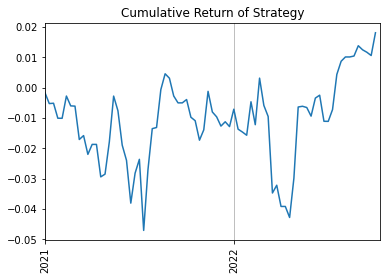

In [231]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
exec_interval = 1
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = 20211101
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

Number of backtest days:  78
Trading frequency:  94.87%
Annualized return:  7.86%
Annualized volatility: 13.18%
Annualized Sharpe: 0.60
Hit Ratio: 0.50
Max Drawdown: 5.07%
Average profit per trade before cost: 0.07%
Average profit per trade after cost: 0.03%


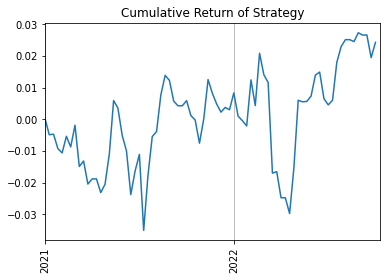

In [232]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
exec_interval = 0
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = 20211101
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

Number of backtest days:  78
Trading frequency:  94.87%
Annualized return:  4.28%
Annualized volatility: 13.18%
Annualized Sharpe: 0.32
Hit Ratio: 0.47
Max Drawdown: 5.16%
Average profit per trade before cost: 0.07%
Average profit per trade after cost: 0.02%


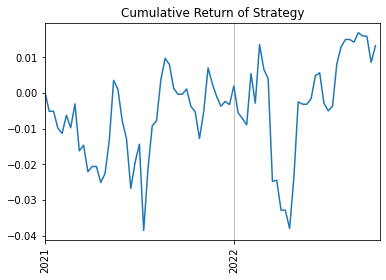

In [218]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ open_df[930] - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
exec_interval = 0
trade_time = valid_time[idx + exec_interval]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
alpha_df[is_roll_day] = 0

start_date = 20211101
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 1.5, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [219]:
pnl_v.shape

(78,)

In [220]:
print('Mon median return (in bps): ', np.mean(pnl_v[day_of_week_v[-78:] == 0]) * 1e4)
print('Tue median return (in bps): ', np.mean(pnl_v[day_of_week_v[-78:] == 1]) * 1e4)
print('Wed median return (in bps): ', np.mean(pnl_v[day_of_week_v[-78:] == 2]) * 1e4)
print('Thu median return (in bps): ', np.mean(pnl_v[day_of_week_v[-78:] == 3]) * 1e4)
print('Fri median return (in bps): ', np.mean(pnl_v[day_of_week_v[-78:] == 4]) * 1e4)

Mon median return (in bps):  17.51765421097562
Tue median return (in bps):  10.539646278767485
Wed median return (in bps):  -0.36731675716508216
Thu median return (in bps):  7.283461131698884
Fri median return (in bps):  -24.507830610472762


* volume analysis

In [187]:
daily_volume_df = total_volume_df.sum(axis=1)

In [188]:
daily_volume_df

date
20171106     16840
20171107     20575
20171108     19996
20171109     18917
20171110     18323
             ...  
20220221    103292
20220222    176569
20220223    116307
20220224    204428
20220225    127503
Length: 1076, dtype: int64

In [190]:
print('Mon meadian volume: ', np.median(daily_volume_df[day_of_week_v == 0]))
print('Tue meadian volume: ', np.median(daily_volume_df[day_of_week_v == 1]))
print('Wed meadian volume: ', np.median(daily_volume_df[day_of_week_v == 2]))
print('Thu meadian volume: ', np.median(daily_volume_df[day_of_week_v == 3]))
print('Fri meadian volume: ', np.median(daily_volume_df[day_of_week_v == 4]))

Mon meadian volume:  104802.0
Tue meadian volume:  121239.0
Wed meadian volume:  118049.0
Thu meadian volume:  110106.0
Fri meadian volume:  114977.5


In [176]:
mean_interval_volume = total_volume_df.median()

In [179]:
mean_interval_volume

hhmm
930     11307.5
1000    10159.0
1030     9750.0
1100    10833.5
1130    12047.5
1330    13979.5
1400    16653.5
1430    20243.0
1500     3953.0
dtype: float64

In [196]:
filt_volume_df = total_volume_df[day_of_week_v == 0]
print('Mon interval volume median')
print(filt_volume_df.median())
filt_volume_df = total_volume_df[day_of_week_v == 1]
print('Tue interval volume median')
print(filt_volume_df.median())
filt_volume_df = total_volume_df[day_of_week_v == 2]
print('Wed interval volume median')
print(filt_volume_df.median())
filt_volume_df = total_volume_df[day_of_week_v == 3]
print('Thu interval volume median')
print(filt_volume_df.median())
filt_volume_df = total_volume_df[day_of_week_v == 4]
print('Fri interval volume median')
print(filt_volume_df.median())

Mon interval volume median
hhmm
930     10965.0
1000     9106.0
1030     8819.0
1100    10070.0
1130    11053.0
1330    13616.0
1400    15131.0
1430    19579.0
1500     3961.0
dtype: float64
Tue interval volume median
hhmm
930     12059.0
1000    10962.0
1030    10319.0
1100    11388.0
1130    12797.0
1330    15257.0
1400    17185.0
1430    21927.0
1500     3840.0
dtype: float64
Wed interval volume median
hhmm
930     11382.0
1000    10588.0
1030    10284.0
1100    10897.0
1130    12941.0
1330    14122.0
1400    17186.0
1430    21009.0
1500     3775.0
dtype: float64
Thu interval volume median
hhmm
930     10694.0
1000     9888.0
1030     9309.0
1100     9947.0
1130    12075.0
1330    13753.0
1400    15953.0
1430    18773.0
1500     3677.0
dtype: float64
Fri interval volume median
hhmm
930     11143.5
1000    10288.0
1030     9802.5
1100    11215.5
1130    11857.0
1330    13833.5
1400    16602.5
1430    19910.0
1500     4541.0
dtype: float64


* last 2 years

In [182]:
total_volume_df[1030].values[-500:].min()

3405

In [183]:
total_volume_df[1500].values[-500:].min()

28

In [184]:
np.where(total_volume_df[1500].values[-500:] == 28)

(array([234], dtype=int64),)

In [185]:
dates_v[-500:][234]

20210128

### test sensitivity

In [432]:
fut10m_df = fut1m_df.resample('10Min', closed='right', label='right').agg(
            {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 
             'volume': 'sum', 'buy_volume': 'sum', 'sell_volume': 'sum'})
fut10m_df = fut10m_df.dropna()
fut10m_df = fut10m_df.reset_index()
fut10m_df['date'] = fut10m_df['timestamp'].apply(lambda x: x.date())
fut10m_df['date'] = fut10m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
fut10m_df['time'] = fut10m_df['timestamp'].apply(lambda x: x.time())
fut10m_df['hhmm'] = fut10m_df['time'].apply(lambda x: x.hour * 100 + x.minute)

In [433]:
fut10m_df['hhmm']

0         900
1         910
2         920
3         930
4         940
         ... 
29004    1410
29005    1420
29006    1430
29007    1440
29008    1450
Name: hhmm, Length: 29009, dtype: int64

In [435]:
valid_10m_time = [900, 910, 920, 930, 940, 950, 1000, 1010, 1020, 1030, \
                 1040, 1050, 1100, 1110, 1120, 1130, 1310, 1320, 1330, \
                 1340, 1350, 1400, 1410, 1420, 1430, 1440, 1450]

In [436]:
fut10m_filt_df = fut10m_df.loc[fut10m_df['hhmm'].isin(valid_10m_time)]

In [439]:
fut10m_df.head(30)

,timestamp,open,high,low,close,volume,buy_volume,sell_volume,date,time,hhmm
0,2017-11-06 09:00:00,841000.0,841000.0,841000.0,841000.0,1,1,0,20171106,09:00:00,900
1,2017-11-06 09:10:00,841000.0,842200.0,840600.0,841500.0,707,525,182,20171106,09:10:00,910
2,2017-11-06 09:20:00,841500.0,842000.0,841400.0,841500.0,673,299,374,20171106,09:20:00,920
3,2017-11-06 09:30:00,841500.0,842200.0,841500.0,842000.0,852,499,353,20171106,09:30:00,930
4,2017-11-06 09:40:00,841700.0,841800.0,841400.0,841400.0,462,296,166,20171106,09:40:00,940
5,2017-11-06 09:50:00,841400.0,841600.0,841000.0,841000.0,625,248,377,20171106,09:50:00,950
6,2017-11-06 10:00:00,840600.0,841500.0,840500.0,841200.0,532,204,328,20171106,10:00:00,1000
7,2017-11-06 10:10:00,841200.0,841200.0,839800.0,840100.0,624,349,275,20171106,10:10:00,1010
8,2017-11-06 10:20:00,840000.0,840000.0,839400.0,839600.0,498,151,347,20171106,10:20:00,1020
9,2017-11-06 10:30:00,839600.0,840800.0,839300.0,839300.0,582,275,307,20171106,10:30:00,1030


In [437]:
fut10m_filt_df['close'] = fut10m_filt_df['close'].ffill()

<ipython-input-437-fd23159b1ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fut10m_filt_df['close'] = fut10m_filt_df['close'].ffill()


In [438]:
open10m_df_ = fut10m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'open')
close10m_df_ = fut10m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'close')

940
Number of backtest days:  1076
Trading frequency:  92.10%
Annualized return:  41.70%
Annualized volatility: 19.13%
Annualized Sharpe: 2.18
Hit Ratio: 0.53
Max Drawdown: 18.09%
Average profit per trade before cost: 0.22%
Average profit per trade after cost: 0.18%


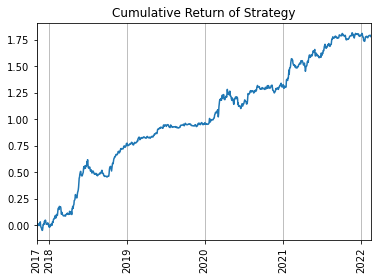

950
Number of backtest days:  1076
Trading frequency:  93.49%
Annualized return:  34.89%
Annualized volatility: 19.14%
Annualized Sharpe: 1.82
Hit Ratio: 0.53
Max Drawdown: 17.41%
Average profit per trade before cost: 0.18%
Average profit per trade after cost: 0.15%


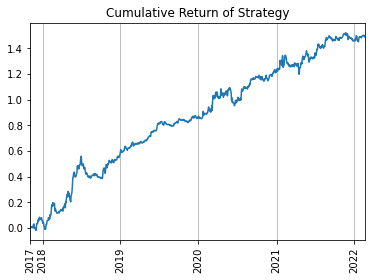

1000
Number of backtest days:  1076
Trading frequency:  94.05%
Annualized return:  43.83%
Annualized volatility: 18.78%
Annualized Sharpe: 2.33
Hit Ratio: 0.55
Max Drawdown: 15.93%
Average profit per trade before cost: 0.22%
Average profit per trade after cost: 0.18%


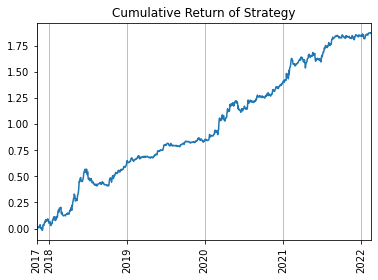

1010
Number of backtest days:  1076
Trading frequency:  93.03%
Annualized return:  43.16%
Annualized volatility: 18.43%
Annualized Sharpe: 2.34
Hit Ratio: 0.53
Max Drawdown: 11.16%
Average profit per trade before cost: 0.22%
Average profit per trade after cost: 0.18%


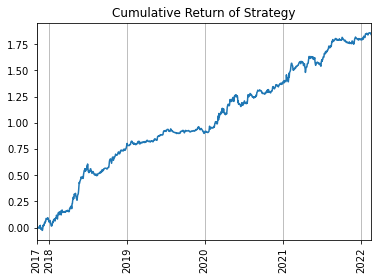

1020
Number of backtest days:  1076
Trading frequency:  93.87%
Annualized return:  40.11%
Annualized volatility: 18.13%
Annualized Sharpe: 2.21
Hit Ratio: 0.55
Max Drawdown: 16.08%
Average profit per trade before cost: 0.21%
Average profit per trade after cost: 0.17%


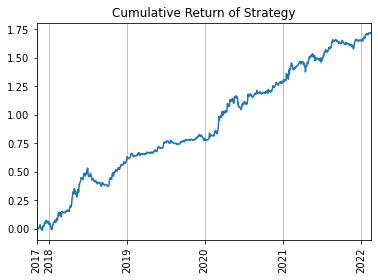

In [443]:
for signal_time in [940, 950, 1000, 1010, 1020]:
    print(signal_time)
    signal_return_df = close10m_df_[signal_time]/ open10m_df_[910] - 1
    alpha_df = np.sign(signal_return_df)
    alpha_df[~np.isfinite(alpha_df)] = 0
    exec_interval = 0
    idx = valid_10m_time.index(signal_time)
    trade_time = valid_10m_time[idx + exec_interval]
    realized_return_df = close10m_df_[1450]/ close10m_df_[trade_time] - 1
    realized_return_df[~np.isfinite(realized_return_df)] = 0
    alpha_df[is_roll_day] = 0

    start_date = None
    end_date = None

    if start_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index > start_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
    if end_date is not None:
        alpha_df = alpha_df.loc[alpha_df.index < end_date]
        realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

    pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
    simOp.show_strategy_plot(pnl_v, alpha_df.index)

* if we use open from vndirect

In [454]:
fut_close_df = pd.read_csv('data/futures/VN30F1M.csv')

In [455]:
fut_close_df.head(3)

,Unnamed: 0,t,c,o,h,l,v,s
0,0,2018-01-23 07:00:00+07:00,1100.0,1087.5,1103.0,1087.1,10305,ok
1,1,2018-01-24 07:00:00+07:00,1103.0,1100.0,1106.8,1098.1,10735,ok
2,2,2018-01-25 07:00:00+07:00,1119.0,1106.0,1123.5,1105.9,18230,ok


In [456]:
fut_close_df['date'] = fut_close_df['t'].apply(lambda x: x[:10])
fut_close_df['date'] = pd.to_datetime(fut_close_df['date'])
fut_close_df['date'] = fut_close_df['date'].apply(lambda x: x.date())
fut_close_df['date'] = fut_close_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
open_df2 = fut_close_df[['date','o']]

In [459]:
open_df2 = open_df2.set_index('date')

In [460]:
open_df2.head(3)

,o
date,
20180123,1087.5
20180124,1100.0
20180125,1106.0


In [466]:
close_df_new = close_df.reindex(index = open_df2.index)
open_df_new = open_df.reindex(index = open_df2.index)

Number of backtest days:  1000
Trading frequency:  84.10%
Annualized return:  44.76%
Annualized volatility: 17.63%
Annualized Sharpe: 2.54
Hit Ratio: 0.56
Max Drawdown: 15.12%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.21%


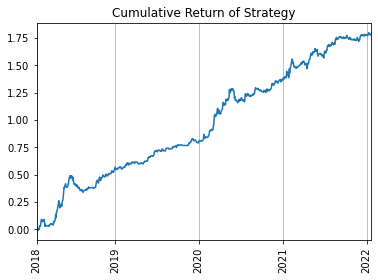

In [467]:
signal_time = 1000
signal_return_df = close_df_new[signal_time]/ open_df_new[930] - 1

alpha_df = np.sign(signal_return_df)
lower_thred = 5
alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

trade_time = 1030
realized_return_df = close_df_new[1500]/ close_df_new[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
# alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)

In [471]:
open_df2['o'] = open_df2['o'] * 1e3

Number of backtest days:  1000
Trading frequency:  84.50%
Annualized return:  44.78%
Annualized volatility: 17.53%
Annualized Sharpe: 2.56
Hit Ratio: 0.56
Max Drawdown: 14.47%
Average profit per trade before cost: 0.25%
Average profit per trade after cost: 0.21%


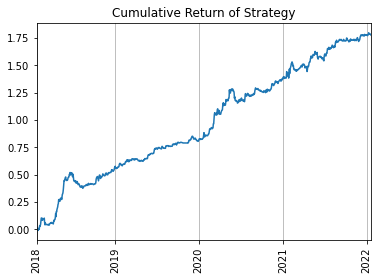

In [472]:
signal_time = 1000
signal_return_df = close_df_new[signal_time]/ open_df2['o'] - 1

alpha_df = np.sign(signal_return_df)
lower_thred = 5
alpha_df[signal_return_df.abs() <= (lower_thred/1e4)] = 0

trade_time = 1030
realized_return_df = close_df_new[1500]/ close_df_new[trade_time] - 1
alpha_df[~np.isfinite(alpha_df)] = 0
# alpha_df[is_roll_day] = 0

start_date = None
end_date = None

if start_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index > start_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index > start_date]
if end_date is not None:
    alpha_df = alpha_df.loc[alpha_df.index < end_date]
    realized_return_df = realized_return_df.loc[realized_return_df.index < end_date]

pnl_v, _ = simOp.sim(alpha_df.values, realized_return_df.values, TC_c_bps = 0.75, TC_ba_bps = 2.0)
simOp.show_strategy_plot(pnl_v, alpha_df.index)